In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif


In [2]:
# Set style for visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Sheronah baBy\datasets\WineQT.csv")
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df.shape

(1143, 13)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [10]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


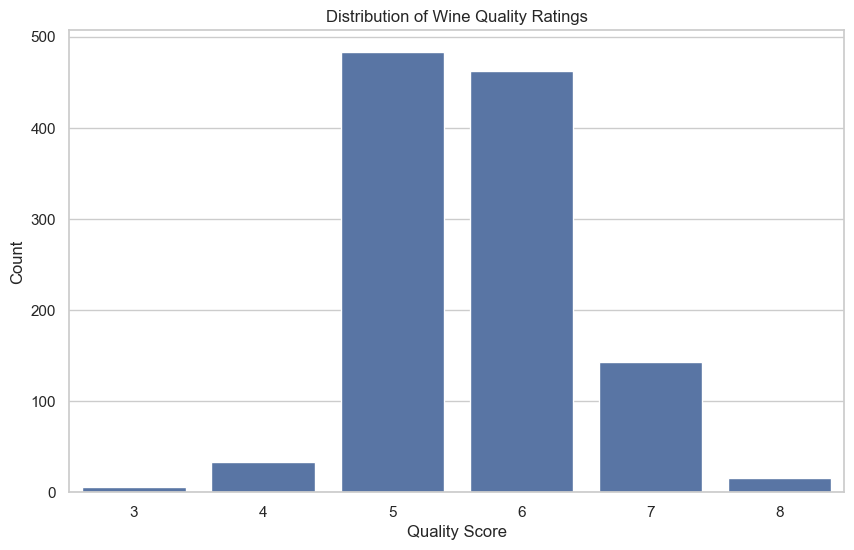

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

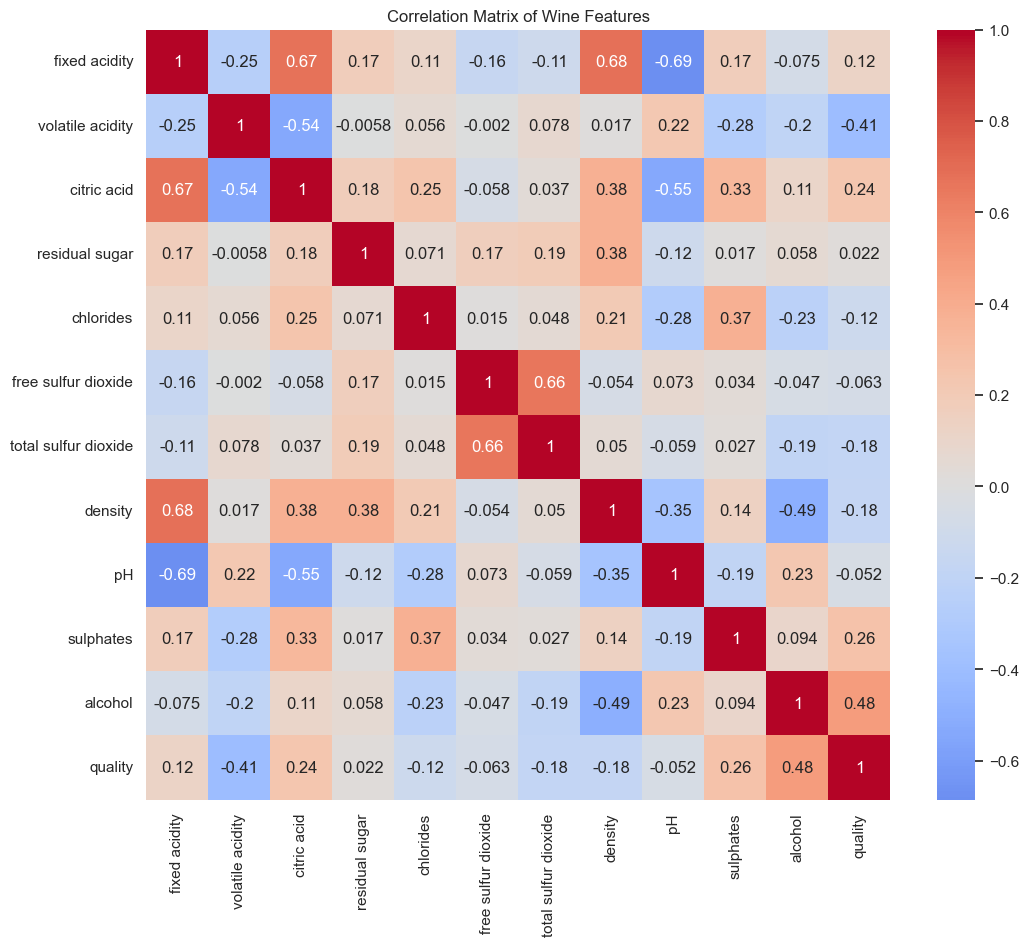

In [17]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Features')
plt.show()

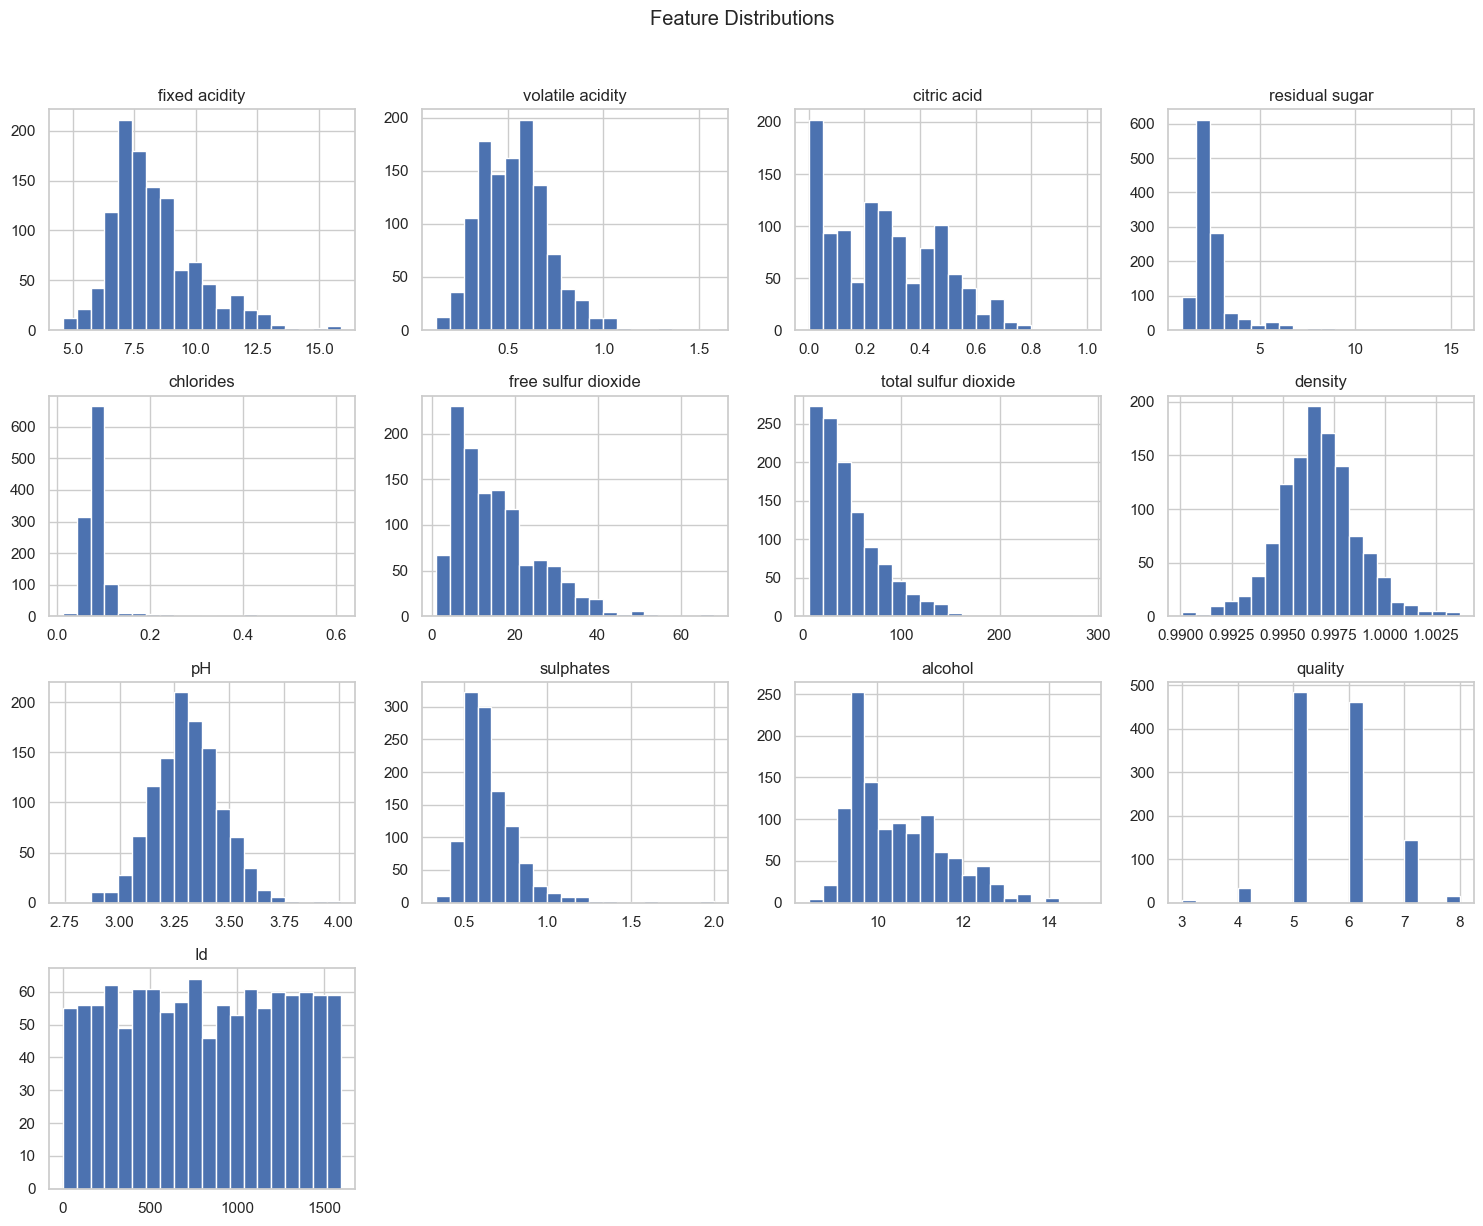

In [12]:
df.hist(bins=20, figsize=(15, 12))
plt.suptitle('Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()

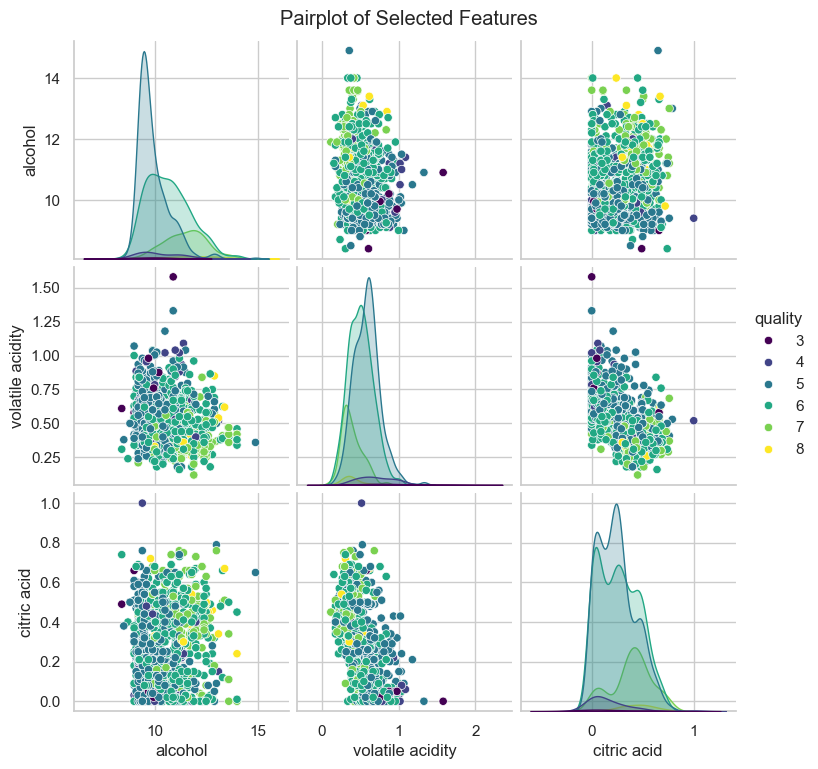

In [13]:
sns.pairplot(df[['alcohol', 'volatile acidity', 'citric acid', 'quality']], 
             hue='quality', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


In [14]:
df['quality_class'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
print("\nQuality class distribution:")
print(df['quality_class'].value_counts())


Quality class distribution:
quality_class
0    984
1    159
Name: count, dtype: int64


In [15]:
X = df.drop(['quality', 'quality_class'], axis=1)
y = df['quality_class']

In [18]:
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)

# Get selected features# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)

print("\nSelected features:", list(selected_features))
X = X[selected_features]


Selected features: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SGD Classifier': SGDClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {}
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }

# Display results
for name, result in results.items():
    print(f"\n{name} Results:")
    print("="*50)
    print(f"Cross-validation Mean Accuracy: {result['cv_mean']:.4f} (±{result['cv_std']:.4f})")
    print(f"Test Accuracy: {result['accuracy']:.4f}")
    print("\nClassification Report:")
    print(result['report'])
    print("\nConfusion Matrix:")
    print(result['confusion_matrix'])


Random Forest Results:
Cross-validation Mean Accuracy: 0.9081 (±0.0232)
Test Accuracy: 0.9170

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       197
           1       0.78      0.56      0.65        32

    accuracy                           0.92       229
   macro avg       0.86      0.77      0.80       229
weighted avg       0.91      0.92      0.91       229


Confusion Matrix:
[[192   5]
 [ 14  18]]

SGD Classifier Results:
Cross-validation Mean Accuracy: 0.8436 (±0.0548)
Test Accuracy: 0.8559

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       197
           1       0.47      0.22      0.30        32

    accuracy                           0.86       229
   macro avg       0.67      0.59      0.61       229
weighted avg       0.82      0.86      0.83       229


Confusion Matrix:
[[189   8]
 [ 25   7]]

SVM Results:
Cross-val

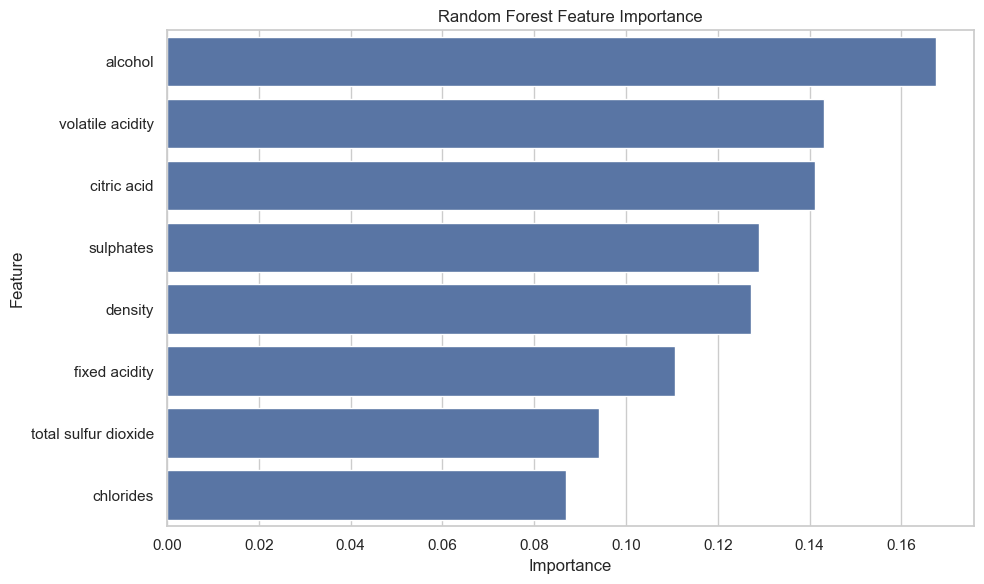

In [22]:
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

C:\Users\Sheronah baBy\AppData\Local\Temp\ipykernel_19248\438649384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data=model_comparison, palette='viridis')


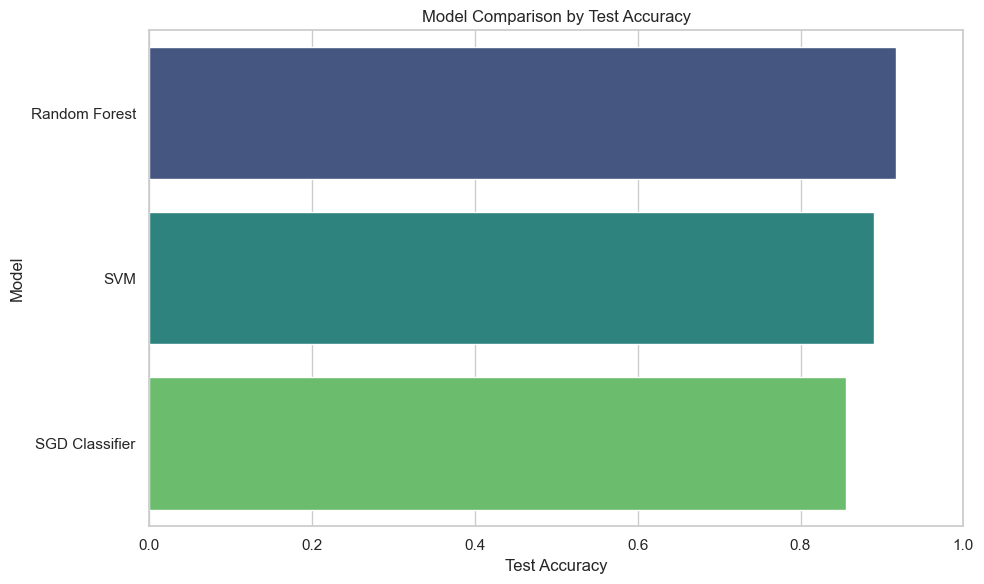

In [23]:
model_comparison = pd.DataFrame({
    'Model': [name for name in results],
    'CV Mean Accuracy': [result['cv_mean'] for result in results.values()],
    'Test Accuracy': [result['accuracy'] for result in results.values()]
}).sort_values('Test Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y='Model', data=model_comparison, palette='viridis')
plt.title('Model Comparison by Test Accuracy')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()